# Guided Projects Artificial Intelligence & Machine Learning
## Guided Projects: Unsupervised Learning
### Incremental Clustering: Intrusion Detection by Visual Surveillance
Detection of abnormalities in live videos requires optimized scene representation which involves 
real-time detection of objects while efficiently representing the state of objects temporally across 
frames. For such purposes, Incremental Clustering can be used. Incremental clustering
allows clustering of pixels with motion which is further used for mapping the trajectories in 
subsequent frames and can be used for Surveillance and for real-time traffic analysis.
### Question:
In today's world, the data is dynamic and hence, it is not always feasible to use Non -incremental
clustering techniques which rely on the complete dataset for forming the clusters. Thus, we need an 
incremental clustering algorithm that automatically adapts to itself as the data points increase. 
Implement a basic incremental K Means algorithm using the iris dataset (available in scikit-learn module or can download the csv file). Once done, try using the same algorithm for intrusion 
detection using any video of your choice (Only one such video is required as our algorithm will 
learn as the new frames are introduced automatically).

In [18]:
# Importing libraries
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import sys
import cv2
%matplotlib inline

In [19]:
# Function to initialize the mean and vector images
def initBackground(initImage):
    img_arr = mpimg.imread(initImage)
    mean = img_arr
    var = 9*np.ones(img_arr.shape)
    return (mean, var)


In [51]:
# Classify images into foreground and background pixels using Chebyshevs inequality based classifier
def ForegroundDetection(img_file, mean, variance, lmda):
    img = mpimg.imread(img_file)
    d = img - mean
    y = var*(lmda**2)
    d_2 = np.square(d)
    I = d_2 - y
    mask = np.all(I>0, axis = 2)
    r1 = 255*mask.astype(int)
    r1 = r1.astype(np.uint8)
    return r1

In [52]:
# Reduce image noise using voting scheme
def Voting(rI, eta, m, n):
    r,c = rI.shape
    cI = np.zeros((rI.shape[0], rI.shape[1]))
    for i in range(m,r-1-m):
        for j in range(n,c-1-n):
            img_patch = rI[i-m:i, j-n:j]
            y_unq, counts = np.unique(img_patch, return_counts = True)
            if len(counts) == 1 and y_unq[0] == 1:
                cI[i,j] = 255
            if len(counts) > 1:
                if counts[1] > eta*m*n:
                    cI[i,j] = 255
    cI = cI.astype(np.uint8)
    return cI

In [62]:
# Update the mean and variance images using a weighted average scheme
def meanvarUpdate(cI, img_path, M, V, alpha):
    img = mpimg.imread(img_path)
    mean_upd = np.zeros(img.shape)
    var_upd = np.zeros(img.shape)
    d = img - M
    d_2 = np.square(d)
    for i in range(cI.shape[0]):
        for j in range(cI.shape[1]):
            if cI[i,j] == 0:
                mean_upd[i,j,:] = (1-alpha)*M[i,j,:] + alpha*img[i,j,:]
                var_upd[i,j,:] = (1-alpha)*M[i,j,:] + alpha*d_2[i,j,:]
                var_upd[i,j,:] = np.clip(var_upd[i,j,:], a_min = 9, a_max = None)
    return(mean_upd, var_upd)
                

In [88]:
def Background_Subtraction(img_dir, lmda, eta, m, n, alpha):
    img_file_name = os.listdir(img_dir)
    initImage = os.path.join(img_dir, img_file_name[0])
    mean, var = initBackground(initImage)
    
    for i in range(1, len(img_file_name)):
        img_path = os.path.join(img_dir, img_file_name[i])
        fig, ax = plt.subplots(1,3,figsize = (10,10))
        rI = ForegroundDetection(img_path, mean, var, lmda)
        ax[0].imshow(rI, cmap = 'gray')
    
        cI = Voting(rI, eta, m, n)
        mean, var = meanvarUpdate(cI, img_path, mean, var, alpha)
        ax[1].imshow(cI, cmap = 'gray')
        
        img = mpimg.imread(img_path)
        ax[2].imshow(img, cmap = 'gray')
        
        plt.show()

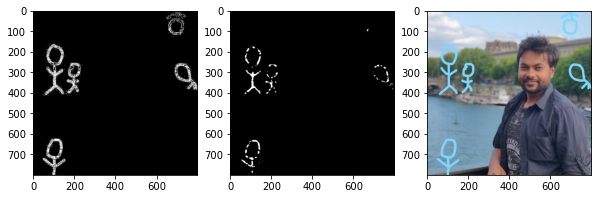

In [89]:
Background_Subtraction("./Images", 0.8, 0.7, 8, 8, 0.8)

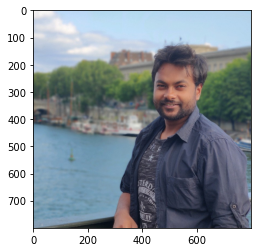

In [93]:
ori_img = plt.imread('.\Images\Image.jpg')
plt.imshow(ori_img);